In [2]:
from bs4 import BeautifulSoup
import urllib
from pandas import Series, DataFrame
import pandas as pd
import numpy as np  
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import itertools
import networkx as nx
from sklearn import manifold
%pylab inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/timothylai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Populating the interactive namespace from numpy and matplotlib


In [61]:
locations = ['birmingham-2','birmingham','huntsville','auburn','tuscaloosa','homewood','decatur','louisville-3',
            'lexington','dallas-2','dallas-5','garland','casa-linda-dallas','austin','austin-2','san-antonio',
            'houston','waco','fort-worth','fort-worth-4','southlake-southlake']

#define the function for scraping the pages
def PageToList(URL,n,l):
    for i in range(0,int(math.ceil(n/20))+1):
        URL1 = URL + "?start=" + str(20*i)
        print URL1
        page = urllib.urlopen(URL1).read()
        soup = BeautifulSoup(page)
        page_comments = soup.find_all("div", class_="review review--with-sidebar")
        for i in range(0,len(page_comments)):
            post_date = page_comments[i].find("span", class_="rating-qualifier").get_text().encode('utf-8').strip()
            post_userid = page_comments[i].find("li", class_="user-name").get_text().encode('utf-8').strip()
            post_message = page_comments[i].find("p").get_text().encode('utf-8').strip()
            post_location = l
            post_stars = page_comments[i].find("img", class_="offscreen")['alt'].rstrip('.0 star rating')
            
            comment_tuple = [post_date,post_userid,post_location,post_stars,post_message]
            Results_list.append(comment_tuple)
    return

def numReviews(URL,l):
    page = urllib.urlopen(URL).read()
    soup = BeautifulSoup(page)
    num_reviews = soup.find("span",class_="review-count rating-qualifier").get_text().encode('utf-8').strip().rstrip(' reviews')
    PageToList(URL,int(num_reviews),l)
    return

#initialize a list to hold the results
Results_list = []
#call the scraper for 250 pages of messages
for l in locations:
    x = 'https://www.yelp.com/biz/steel-city-pops-' + l
    numReviews(x,l)

# #Put the results into a dataframe and export to csv
Results_df = DataFrame(Results_list,columns=['Date','UserName', 'Location', 'stars','Message'])
Results_df

https://www.yelp.com/biz/steel-city-pops-birmingham-2?start=0
https://www.yelp.com/biz/steel-city-pops-birmingham?start=0
https://www.yelp.com/biz/steel-city-pops-birmingham?start=20
https://www.yelp.com/biz/steel-city-pops-huntsville?start=0
https://www.yelp.com/biz/steel-city-pops-auburn?start=0
https://www.yelp.com/biz/steel-city-pops-tuscaloosa?start=0
https://www.yelp.com/biz/steel-city-pops-tuscaloosa?start=20
https://www.yelp.com/biz/steel-city-pops-homewood?start=0
https://www.yelp.com/biz/steel-city-pops-homewood?start=20
https://www.yelp.com/biz/steel-city-pops-homewood?start=40
https://www.yelp.com/biz/steel-city-pops-homewood?start=60
https://www.yelp.com/biz/steel-city-pops-homewood?start=80
https://www.yelp.com/biz/steel-city-pops-homewood?start=100
https://www.yelp.com/biz/steel-city-pops-homewood?start=120
https://www.yelp.com/biz/steel-city-pops-homewood?start=140
https://www.yelp.com/biz/steel-city-pops-decatur?start=0
https://www.yelp.com/biz/steel-city-pops-louisvil

,Date,UserName,Location,stars,Message
0,5/28/2017,Tim M.,birmingham-2,5,This is Birmingham's version of Nashville's La...
1,8/16/2017,Kayla S.,birmingham-2,5,I LOVEEEEE Steel City Pops! It's like you're h...
2,5/2/2016,Lisa H.,birmingham-2,5,Where else in The Ham can you buy frozen confe...
3,9/17/2016,Justin W.,birmingham-2,5,100% worth it. I was a doubter the first time....
4,12/13/2016,April D.,birmingham-2,5,Love Steel City... I just stopped by last nig...
5,9/28/2016,Jamie S.,birmingham-2,5,I love all of the pops and the staff is always...
6,7/29/2016,Tiffany W.,birmingham-2,5,Drove by their Airstream trailer several times...
7,9/20/2016,Brandy D.,birmingham-2,5,My office loves taking a mid-afternoon break a...
8,5/11/2016,Hailey S.,birmingham-2,5,Such a good Popsicles!!! All flavors are very ...
9,8/8/2015,William R.,birmingham-2,5,Calling these popsicles doesn't do them justic...


In [51]:
x =num_reviews.rstrip(' reviews')
x = int(x)
type(x)

int

In [62]:
len(Results_df)

1764

In [3]:
Results_df = pd.read_csv('damndaniel.csv')

In [4]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

def reviews_to_words(message):
    # Function to convert a raw message to a string of words
    #
    # Remove non-letters 
    letters_only = re.sub("[^a-zA-Z]", " ", str(message)) 
    #
    # Convert to lower case, split into individual words
    words = letters_only.lower().split() 
    #    
    # Remove stop words
    stops = set(stopwords.words("english")) 
    non_stop_words = [w for w in words if w not in stops] 
    #
    # Lemmatize
    lemma = WordNetLemmatizer()
    meaningful_words = []
    for w in non_stop_words:
        lemmaword = lemma.lemmatize(w)
        meaningful_words.append(lemmaword)
    
    # Remove duplicates
    uwords = []
    [uwords.append(x) for x in meaningful_words if x not in uwords]
    #
    # Join the words back into one string separated by space, 
    onestring = ( " ".join( uwords ))
     
    # Append to new list "cleanmessages"
    cleanmessages.append(onestring)
    #
    # return the string
    return onestring


cleanmessages = []

Results_df['MessageWords'] = Results_df['Message'].map(reviews_to_words)
Results_df.head()

,Unnamed: 0,Date,UserName,Location,stars,Message,MessageWords
0,0,5/28/2017,Tim M.,birmingham-2,5,This is Birmingham's version of Nashville's La...,birmingham version nashville la paletas except...
1,1,8/16/2017,Kayla S.,birmingham-2,5,I LOVEEEEE Steel City Pops! It's like you're h...,loveeeee steel city pop like treat eating horr...
2,2,5/2/2016,Lisa H.,birmingham-2,5,Where else in The Ham can you buy frozen confe...,else ham buy frozen confection spaceship like ...
3,3,9/17/2016,Justin W.,birmingham-2,5,100% worth it. I was a doubter the first time....,worth doubter first time wised realized popsic...
4,4,12/13/2016,April D.,birmingham-2,5,Love Steel City... I just stopped by last nig...,love steel city stopped last night got pack fa...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 5000) 

train_data_features = vectorizer.fit_transform(cleanmessages)
vocab = vectorizer.get_feature_names()
df_features = pd.DataFrame(data = train_data_features.toarray() , columns = vocab)
df_features.head()

,aargh,aaron,ability,able,aboard,absolute,absolutely,absurd,abundance,abut,...,zillion,zing,zip,ziploc,ziplock,zipper,zombie,zone,zoo,zubar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_features_T = df_features.T
df_features_T['Sum'] = df_features_T.sum(axis=1)
df_features_counts = df_features_T['Sum'].sort_values(ascending=False)
df_features_counts.to_csv('counts4daniel.csv')

combined_df = Results_df.merge(df_features, left_index=True, right_index=True)
combined_df

,Unnamed: 0,Date,UserName,Location,stars,Message,MessageWords,aargh,aaron,ability,...,zillion,zing,zip,ziploc,ziplock,zipper,zombie,zone,zoo,zubar
0,0,5/28/2017,Tim M.,birmingham-2,5,This is Birmingham's version of Nashville's La...,birmingham version nashville la paletas except...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8/16/2017,Kayla S.,birmingham-2,5,I LOVEEEEE Steel City Pops! It's like you're h...,loveeeee steel city pop like treat eating horr...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,5/2/2016,Lisa H.,birmingham-2,5,Where else in The Ham can you buy frozen confe...,else ham buy frozen confection spaceship like ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9/17/2016,Justin W.,birmingham-2,5,100% worth it. I was a doubter the first time....,worth doubter first time wised realized popsic...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,12/13/2016,April D.,birmingham-2,5,Love Steel City... I just stopped by last nig...,love steel city stopped last night got pack fa...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,9/28/2016,Jamie S.,birmingham-2,5,I love all of the pops and the staff is always...,love pop staff always friendly ready serve smi...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,7/29/2016,Tiffany W.,birmingham-2,5,Drove by their Airstream trailer several times...,drove airstream trailer several time stopping ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,9/20/2016,Brandy D.,birmingham-2,5,My office loves taking a mid-afternoon break a...,office love taking mid afternoon break going l...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,5/11/2016,Hailey S.,birmingham-2,5,Such a good Popsicles!!! All flavors are very ...,good popsicle flavor authentic true name highl...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,8/8/2015,William R.,birmingham-2,5,Calling these popsicles doesn't do them justic...,calling popsicle justice good love variety gou...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


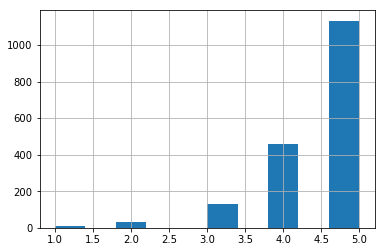

In [7]:
combined_df['stars'] = combined_df['stars'].map(int)
combined_df['stars'].hist()

In [26]:
one_stars = combined_df[combined_df['stars'] == 1]
one_stars_copy = one_stars.copy()

del one_stars_copy['Unnamed: 0']
del one_stars_copy['Date']
del one_stars_copy['UserName']
del one_stars_copy['Location']
del one_stars_copy['stars']
del one_stars_copy['Message']
del one_stars_copy['MessageWords']

one_stars_T = one_stars_copy.T
one_stars_T['Sum'] = one_stars_T.sum(axis=1)
one_stars_counts = one_stars_T['Sum'].sort_values(ascending=False)
one_stars_counts[:10]

went            5
business        5
place           4
good            4
pop             4
disappointed    3
walked          3
great           3
customer        3
chocolate       3
Name: Sum, dtype: int64

#### Check word frequencies for 5 star reviews

In [27]:
five_stars = combined_df[combined_df['stars'] == 5]
five_stars_copy = five_stars.copy()

del five_stars_copy['Unnamed: 0']
del five_stars_copy['Date']
del five_stars_copy['UserName']
del five_stars_copy['Location']
del five_stars_copy['stars']
del five_stars_copy['Message']
del five_stars_copy['MessageWords']

five_stars_T = five_stars_copy.T
five_stars_T['Sum'] = five_stars_T.sum(axis=1)
five_stars_counts = five_stars_T['Sum'].sort_values(ascending=False)
five_stars_counts[:10]

pop          644
flavor       580
popsicle     549
place        441
one          370
like         365
great        339
creamy       296
cream        292
delicious    291
Name: Sum, dtype: int64